### Mount Google Drive & add project to path

In [1]:
from google.colab import drive, userdata
import sys

drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/TikTok_Tech_Jam'
sys.path.append(f'{project_path}/src')

print("Drive mounted and project path added.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted and project path added.


### Authenticate w/ Hugging Face Token

In [2]:
huggingface_token = userdata.get('TikTokTechJam2025')

if huggingface_token:
  print("HuggingFace token successfully found.")
else:
  print("HuggingFace token not found. Please add it to the Secrets manager using the name 'TikTokTechJam2025'.")

HuggingFace token successfully found.


### Import modules

In [3]:
# Run install line again to ensure all required libraries are installed
!pip install -r "/content/drive/MyDrive/TikTok_Tech_Jam/requirements.txt"

# Import .py files in src folder
from data_preprocessing import preprocess_data
from image_analysis import generate_image_descriptions_from_folder
from feature_engineering import (get_unified_data, get_unified_data_for_inference)
from model_training import *
from policy_enforcement import classify_new_review

print("Modules imported successfully.")

Modules imported successfully.


### Define file paths

In [4]:
# Store/Organise all file paths in one place
RAW_DATA_PATH = f'{project_path}/data/merged_reviews_4.csv'
PROCESSED_DATA_PATH = f'{project_path}/data/processed_reviews.csv'
IMAGE_FOLDER_PATH = f'{project_path}/data/dataset'

print("File paths defined.")

File paths defined.


### Run the pipeline for training model

#### Step 1: Data Preprocessing

In [5]:
print("--- Running Data Preprocessing ---")
# Call the function from data_preprocessing.py
final_df = preprocess_data(
    input_file=RAW_DATA_PATH,
    output_file=PROCESSED_DATA_PATH,
    image_folder_path=IMAGE_FOLDER_PATH
)
print("--- Data Preprocessing Complete ---\n")

--- Running Data Preprocessing ---

Loading Salesforce/blip-image-captioning-base model...


/content/drive/MyDrive/TikTok_Tech_Jam/src/data_preprocessing.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)
/content/drive/MyDrive/TikTok_Tech_Jam/src/data_preprocessing.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

Image-to-text pipeline loaded successfully.
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Er

#### Step 2: Feature Engineering

In [6]:
print("--- Running Feature Engineering ---")
# Call the function from src/feature_engineering.py
model_df = get_unified_data(final_df)
print("--- Feature Engineering Complete ---")

--- Running Feature Engineering ---


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


TF-IDF Vectorizer saved to: /content/drive/MyDrive/TikTok_Tech_Jam/models/tfidf_vectorizer.pkl
Sentence Transformer model 'all-MiniLM-L6-v2' loaded.

Generating embeddings for all reviews... (This may take a few minutes depending on dataset size)


Batches:   0%|          | 0/47 [00:00<?, ?it/s]


Embeddings generated successfully. The shape of our new data is: (1482, 384)
Created new DataFrame for the embedding features.
Successfully merged embeddings with the main DataFrame to create an all-features set. This all-features set contains all features and text.
--- Feature Engineering Complete ---


#### Step 3: Model Training

--- Running Model Training ---
Generating pseudo-labels...
Separate into X (independent variables) and y (dependent variables)...

Training data prepared.
Number of successfully pseudo-labeled reviews: 1194
Shape of X (Features): (1194, 981)
Shape of y (Labels): (1194,)
Distribution of pseudo-labels:
pseudo_label
Valid Review          577
Advertisement         351
Irrelevant            256
Rant Without Visit     10
Name: count, dtype: int64
Training and saving the baseline model...

Training a Logistic Regression baseline model...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model trained successfully.
Accuracy on test set: 0.8912
Baseline model saved to: /content/drive/MyDrive/TikTok_Tech_Jam/models/classifier_model.pkl
--- Starting Hybrid Prediction Pipeline ---
1. Running Feature Engineering and Rule-based labeling...
   Rules labeled 1194 instances.
   288 instances remain for model prediction.
2. Loading the pre-trained model...
3. Generating predictions on the remaining instances...
--- Pipeline completed successfully. ---
Preparing and splitting data for the final ensemble model...
Training and saving the final production ensemble model...

Training the final production ensemble model...
1. Generating Out-of-Fold predictions for meta-model training...
   Processing Fold 1/5...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Processing Fold 3/5...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 948, number of used features: 0
[LightGBM] [Info] Start training from score -1.438254
[LightGBM] [Info] Start training from score -1.416275
[LightGBM] [Info] Start training from score -5.062595
[LightGBM] [Info] Start training from score -0.666090
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Processing Fold 4/5...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 948, number of used features: 0
[LightGBM] [Info] Start training from score -1.442708
[LightGBM] [Info] Start training from score -1.411937
[LightGBM] [Info] Start training from score -5.062595
[LightGBM] [Info] Start training from score -0.666090
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Processing Fold 5/5...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 948, number of used features: 0
[LightGBM] [Info] Start training from score -1.438254
[LightGBM] [Info] Start training from score -1.411937
[LightGBM] [Info] Start training from score -5.062595
[LightGBM] [Info] Start training from score -0.668146
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Li

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 1185, number of used features: 0
[LightGBM] [Info] Start training from score -1.439143
[LightGBM] [Info] Start training from score -1.414538
[LightGBM] [Info] Start training from score -4.998057
[LightGBM] [Info] Start training from score -0.667323
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped

,Metric,Score
0,Overall Accuracy,0.878788
1,Balanced Accuracy,0.654003
2,Kappa Score,0.800823



Classification Report:
                    precision    recall  f1-score   support

     Advertisement       1.00      1.00      1.00        70
        Irrelevant       0.79      0.69      0.74        72
Rant Without Visit       0.00      0.00      0.00         2
      Valid Review       0.86      0.92      0.89       153

          accuracy                           0.88       297
         macro avg       0.66      0.65      0.66       297
      weighted avg       0.87      0.88      0.87       297


Confusion Matrix (Table Format):


,Predicted: Advertisement,Predicted: Irrelevant,Predicted: Rant Without Visit,Predicted: Valid Review
True: Advertisement,70,0,0,0
True: Irrelevant,0,50,0,22
True: Rant Without Visit,0,1,0,1
True: Valid Review,0,12,0,141



Confusion Matrix (Heatmap Visualization):


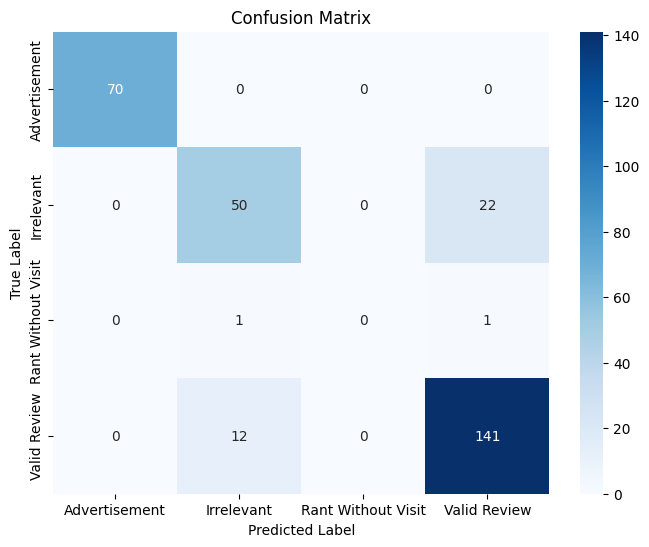


Precision, Recall, and F1-score per Class Visualization:


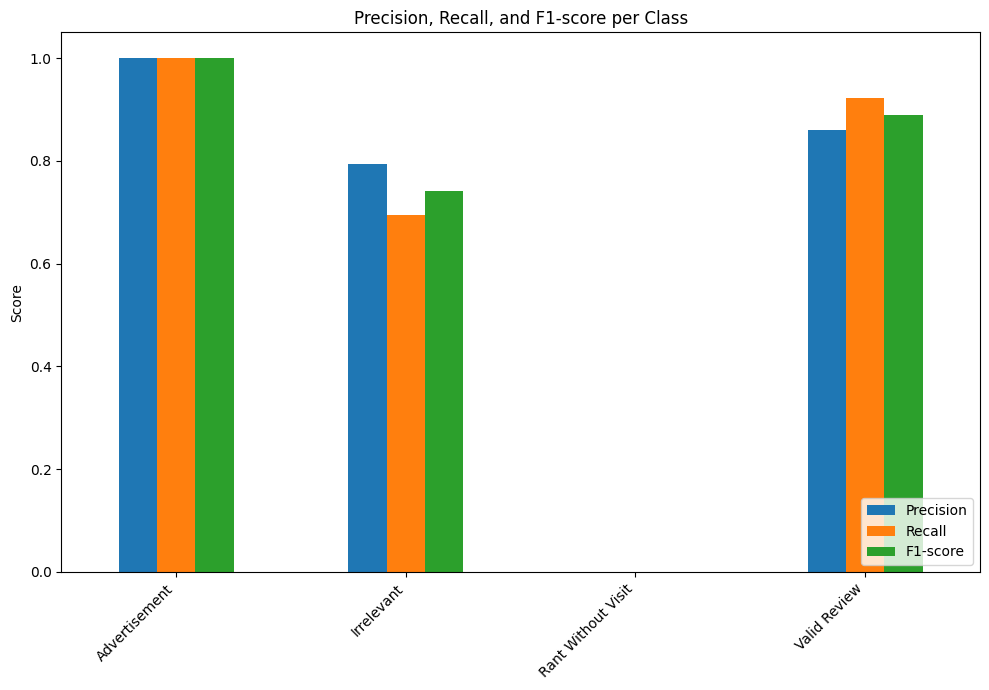


ROC Curve and AUC Score:


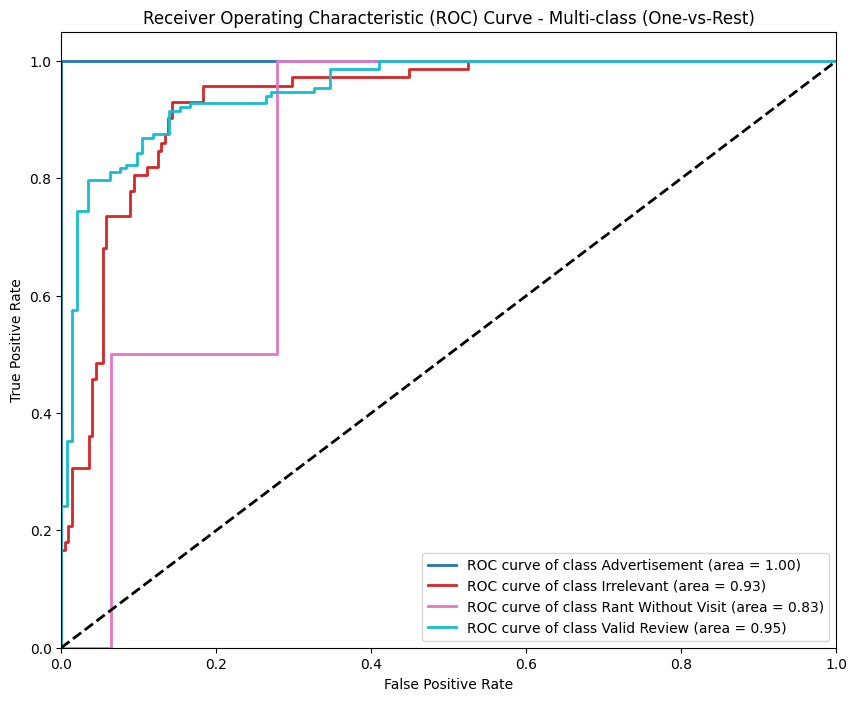


AUC Scores per Class (One-vs-Rest):
  Class Advertisement: 1.0000
  Class Irrelevant: 0.9323
  Class Rant Without Visit: 0.8288
  Class Valid Review: 0.9519


In [7]:
print("--- Running Model Training ---")
# Generate high-confidence pseudo-labels using the policy rules
print("Generating pseudo-labels...")
df_labeled = generate_pseudo_labels(model_df)

# Prepare the data for the baseline model (using only the pseudo-labeled rows)
print("Separate into X (independent variables) and y (dependent variables)...")
X, y = prepare_data_for_training(df_labeled)

# Train and save the simple classifier model
print("Training and saving the baseline model...")
train_and_save_baseline_model(X, y, model_save_path=f'{project_path}/models/classifier_model.pkl')

# Generate labels for entire dataset
df_with_labels = run_prediction_pipeline(model_df, f'{project_path}/models/classifier_model.pkl')

# Prepare and split the fully labeled dataset into specialised feature sets
print("Preparing and splitting data for the final ensemble model...")
(X_classic_train, X_classic_test, y_train, y_test,
 X_tfidf_train, X_tfidf_test,
 X_embeddings_train, X_embeddings_test) = prepare_and_split_data(df_with_labels)

# Train and save the final stacking ensemble model
print("Training and saving the final production ensemble model...")
X_classic_test, X_tfidf_test, X_embeddings_test, y_test, y_pred, y_prob = train_and_save_final_ensemble(
    X_classic_train, X_tfidf_train, X_embeddings_train, y_train,
    X_classic_test, X_tfidf_test, X_embeddings_test, y_test
)

print("--- Model Training Complete ---")

perform_comprehensive_evaluation(y_test, y_pred, y_prob)

## Final function to be used by user to predict

In [8]:
# In src/predict.py

import pandas as pd
import joblib
import os

# Assume these are your modular, in-memory helper functions from the /src directory
from data_preprocessing import preprocess_data
from feature_engineering import get_unified_data_for_inference
from model_training import *

def predict_reviews(input_csv_path: str) -> (pd.DataFrame, dict):
    """
    Takes a CSV file of new reviews, runs the full prediction pipeline,
    saves the results, and returns a DataFrame and a statistics summary.

    Args:
        input_csv_path (str): The path to the new CSV file with reviews.

    Returns:
        (pd.DataFrame, dict): A tuple containing:
            - A DataFrame with the original review data and predicted labels.
            - A dictionary with summary statistics.
    """
    print(f"--- Starting prediction pipeline for {len(input_csv_path)} reviews ---")

    # 1. Define necessary paths for the model and images
    project_base_path = '/content/drive/MyDrive/TikTok_Tech_Jam'
    model_path = os.path.join(project_base_path, 'models', 'final_production_ensemble_model.pkl')
    image_folder_path = os.path.join(project_base_path, 'data', 'dataset')
    output_file = '/content/drive/MyDrive/TikTok_Tech_Jam/data/preprocessed_reviews.csv'

    # 2. Load the trained production model
    try:
        ensemble = joblib.load(model_path)
    except FileNotFoundError:
        print(f"Error: Trained model not found at {model_path}")
        return pd.DataFrame(), {}
    except Exception as e:
        print(f"Error loading model: {e}")
        return pd.DataFrame(), {}

    classic_model = ensemble['classic_model']
    tfidf_model = ensemble['tfidf_model']
    embeddings_model = ensemble['embedding_model']
    final_meta_model = ensemble['final_meta_model']

    # 3. Run the preprocessing and feature engineering pipeline in-memory
    print("Step 1: Preprocessing and generating features...")
    original_df = pd.read_csv(input_csv_path)
    processed_df = preprocess_data(input_csv_path, output_file, image_folder_path)
    # print(processed_df.shape, original_df.shape)
    model_df = get_unified_data_for_inference(processed_df)

    # 4. Make Predictions
    print("Step 2: Making predictions...")
    #have to split model_df into 3 different groups for specific model training first
    print("Splitting dataset ...")
    X_classic, X_tfidf, X_embeddings = transform_for_prediction(model_df)

    print(X_classic.shape)
    print("Generating predictions from base models...")
    new_classic_preds = classic_model.predict_proba(X_classic)
    new_tfidf_preds = tfidf_model.predict_proba(X_tfidf)
    new_embedding_preds = embeddings_model.predict_proba(X_embeddings)

    # Concatenate the new predictions into the meta-feature format
    X_meta_new = pd.concat([
        pd.DataFrame(new_classic_preds),
        pd.DataFrame(new_tfidf_preds),
        pd.DataFrame(new_embedding_preds)
    ], axis=1)

    print("4. Making final classification with the meta-model...")
    # Use the final meta-model to get the predicted labels
    final_predictions = final_meta_model.predict(X_meta_new)

    # 5. Prepare the final output DataFrame
    print(len(new_tfidf_preds), len(new_classic_preds))
    print("------------------------------------------------")
    processed_df["predicted_label"] = final_predictions

    print("\nClassification complete.")


    # 6. Generate Statistics
    total_reviews = len(processed_df)
    label_counts = processed_df['predicted_label'].value_counts().to_dict()

    statistics = {
        'total_reviews_processed': total_reviews,
        'prediction_counts': label_counts
    }

    print("\n--- Pipeline Complete ---")

    print("\n", statistics)

    return processed_df

### for testing purpose


In [10]:
# print("--- Demonstrating the Final Prediction Pipeline ---")
# predictions = predict_reviews('/content/drive/MyDrive/TikTok_Tech_Jam/data/merged_reviews_2.csv')
# predictions.head()

--- Demonstrating the Final Prediction Pipeline ---
--- Starting prediction pipeline for 64 reviews ---
Step 1: Preprocessing and generating features...


/content/drive/MyDrive/TikTok_Tech_Jam/src/data_preprocessing.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)
/content/drive/MyDrive/TikTok_Tech_Jam/src/data_preprocessing.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d


Loading Salesforce/blip-image-captioning-base model...


Device set to use cuda:0


Image-to-text pipeline loaded successfully.
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Error processing image /content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/: [Errno 21] Is a directory: '/content/drive/MyDrive/TikTok_Tech_Jam/data/dataset/'
Er

Batches:   0%|          | 0/41 [00:00<?, ?it/s]

Step 2: Making predictions...
Splitting dataset ...
(1300, 11)
Generating predictions from base models...
4. Making final classification with the meta-model...
1300 1300
------------------------------------------------

Classification complete.

--- Pipeline Complete ---

 {'total_reviews_processed': 1300, 'prediction_counts': {'Valid Review': 748, 'Irrelevant': 352, 'Advertisement': 200}}


,business_name,author_name,photo,rating,rating_category,has_url,exclamation_count,question_mark_count,ellipsis_count,is_zero_visit,all_caps_word_count,capital_letter_percentage,word_count,char_count,text,sentiment_score,predicted_label
0,Kumsal Lokantasi,Ceren Yaman,dataset/taste/kumsal_lokantasi_ceren_yaman.png,5,taste,0,0,1,0,0,0,2.109705,38,227,elite delicious central what more the most pre...,0.8779,Valid Review
1,Korelee,Eyup Kahveci,dataset/menu/korelee_eyup_kahveci.png,3,menu,0,0,0,0,0,0,0.000000,14,78,foods are good but the environment and service...,0.2382,Irrelevant
2,Kofteci Yusuf,Furkan Cam,dataset/menu/kofteci_yusuf_furkan_cam.png,4,menu,0,0,0,0,0,0,7.142857,2,13,great service,0.6249,Irrelevant
3,Ege Vera,Fuat Kaynak,dataset/taste/ege_vera_fuat_kaynak.png,5,taste,0,0,0,1,0,0,1.418440,22,137,covered doner kebab pita is also really delici...,0.5849,Valid Review
4,Baruthane Pilavcisi,Hatice Yildiz,dataset/outdoor_atmosphere/baruthane_pilavcisi...,5,outdoor_atmosphere,0,0,0,0,0,0,3.053435,22,127,the flavor is excellent roasting meat was like...,0.8553,Valid Review
